In [6]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


def showImage(Img, window_name='image'):
    cv.imshow(window_name, Img)
    cv.waitKey(0)
    cv.destroyAllWindows()

    
comp_left = cv.imread("computers_left.png", 0)
comp_right = cv.imread("computers_right.png", 0)

punk_left = cv.imread("daft_punk_left.jpg",0)
punk_right = cv.imread("daft_punk_right.jpg",0) 

comp_left = img1
comp_right =img2

def feature_matching(img1, img2):
    sift = cv.SIFT_create()

    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    bf = cv.BFMatcher(2)
    matches = bf.knnMatch(des1, des2, k=2)

    left_points = []
    right_points = []
    left_points_pt = []
    right_points_pt = []

    listA = []
    for m, n in matches:

        if m.distance < 0.8 * n.distance:  # ratio test
            left_points.append(kp1[m.queryIdx])
            right_points.append(kp2[m.trainIdx])
            left_points_pt.append(kp1[m.queryIdx].pt)
            right_points_pt.append(kp2[m.trainIdx].pt)
            listA.append(m)
    left_points_pt = np.int32(left_points_pt)
    right_points_pt = np.int32(right_points_pt)
    return left_points, right_points, left_points_pt, right_points_pt


#1.1 Feature matching of left and right computer Display output

left_points, right_points, left_points_pt, right_points_pt = feature_matching(comp_left, comp_right)

left_img = cv.drawKeypoints(comp_left, left_points, None)
right_img = cv.drawKeypoints(comp_right, right_points, None)
showImage(left_img, "left Key points")
showImage(right_img, "right Key points")



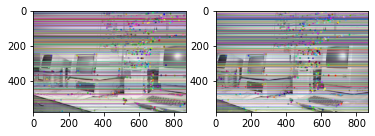

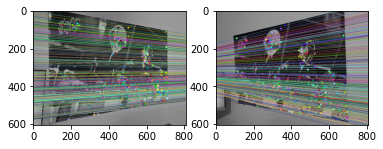

In [7]:
#1.2 Epipolar Lines Calculation

def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv.cvtColor(img1,cv.COLOR_GRAY2BGR)
    img2 = cv.cvtColor(img2,cv.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2



#img1 is the left image, img2 is the right image
def epipolarLines(img1, img2):
    sift = cv.SIFT_create()
    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    # FLANN parameters
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50)
    flann = cv.FlannBasedMatcher(index_params,search_params)
    matches = flann.knnMatch(des1,des2,k=2)
    pts1 = []
    pts2 = []
    # ratio test as per Lowe's paper
    for i,(m,n) in enumerate(matches):
        if m.distance < 0.8*n.distance:
            pts2.append(kp2[m.trainIdx].pt)
            pts1.append(kp1[m.queryIdx].pt)

    pts1 = np.int32(pts1)
    pts2 = np.int32(pts2)
    
    #fundamental matrix calculate
    F, mask = cv.findFundamentalMat(pts1,pts2,cv.FM_LMEDS)
    # We select only inlier points
    pts1 = pts1[mask.ravel()==1]
    pts2 = pts2[mask.ravel()==1]
    # find epi
    # drawing its lines on left image
    lines1 = cv.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
    lines1 = lines1.reshape(-1,3)
    img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)
    # Find epilines corresponding to points in left image (first image) and
    # drawing its lines on right image
    lines2 = cv.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
    lines2 = lines2.reshape(-1,3)
    img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)
    plt.subplot(121),plt.imshow(img5)
    plt.subplot(122),plt.imshow(img3)
    plt.show()
    
    
epipolarLines(comp_left,comp_right)
epipolarLines(punk_left, punk_right) 

In [8]:
#1.3 

img = cv.imread("computers_left.png")
img5 = cv.imread("daft_punk_left.jpg")


#Pick a random point
xmax,ymax,c=img5.shape
x=np.random.randint(0,xmax,1)
y=np.random.randint(0,ymax,1)

#Circle
cv2.circle(img5,(int(x),int(y)),5,(255,0,0),-1)
usr_pts=[[x,y]]
usr_pts = np.int32(usr_pts)

imgright=epiCalcUsrPoint(img2_pts,img3_pts,img2,img3,usr_pts)

plt.title('Left Random Point Computer'),plt.imshow(img5),plt.show()
plt.title('Right Epiline Computer'),plt.imshow(imgright),plt.show()




NameError: name 'cv2' is not defined